In [13]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze USA.gov Data from Bitly

In [15]:
# read data from 'bitly_usagov.txt' file
data = pd.read_json("bitly_usagov.txt", lines=True)
data

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


- How many login from each time zone ?

In [16]:
# check if null values exist in 'tz' column
data["tz"].isnull().sum()

120

In [20]:
# check if values of empty string exist in 'tz' column
# data["tz"].value_counts()
cond = data["tz"] == ""
cond.sum()

521

In [23]:
# replace nulls and empty strings with 'Unknown' in 'tz' column
data["tz"].replace([np.nan, ""], "Unknown", inplace=True)

In [24]:
# Test
data["tz"].isnull().sum()

0

In [25]:
cond = data["tz"] == ""
cond.sum()

0

In [27]:
# count the occurances of each value in 'tz' column
temp = data["tz"].value_counts().head(7)
temp

America/New_York       1251
Unknown                 641
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Name: tz, dtype: int64

![](assets/timezone_freq.png)

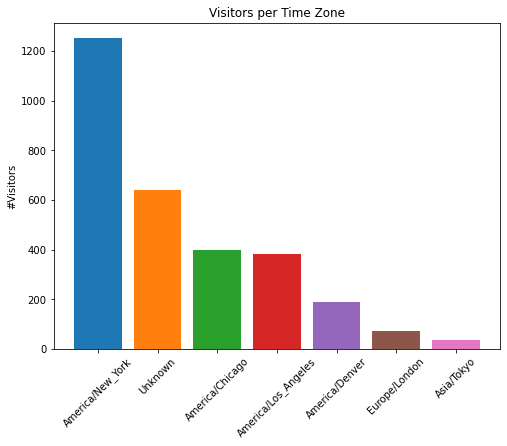

In [34]:
# display a simmilar chart using matplotlib

plt.figure(figsize=(8, 6))

for i in range(len(temp)):
    plt.bar(temp.index[i], temp.values[i])

plt.xticks(rotation=45)
plt.title("Visitors per Time Zone")
plt.ylabel("#Visitors")
plt.show()



# US Baby Names 1880–2010

## Objectives
- Visualize the proportion of babies given a particular name (your own, or another name) over time

In [36]:
# load data of the names of each year from the folder 'babynames'
columns = ["name", "gender", "births"]
pieces = []
for year in range(1880, 2011):
    df = pd.read_csv(f"babynames/yob{year}.txt", names=columns)
    df["year"] = year
    pieces.append(df)

data = pd.concat(pieces, ignore_index=True)
data

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [39]:
# calculate total births for each gender in each year (using groupby)
temp1 = data.groupby(["year", "gender"])["births"].sum().reset_index()
temp1

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [41]:
# calculate total births for each gender in each year (using pivote table)
temp2 = data.pivot_table("births", "year", "gender", "sum")
temp2

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


![](assets/births-by-sex-and-year.png)


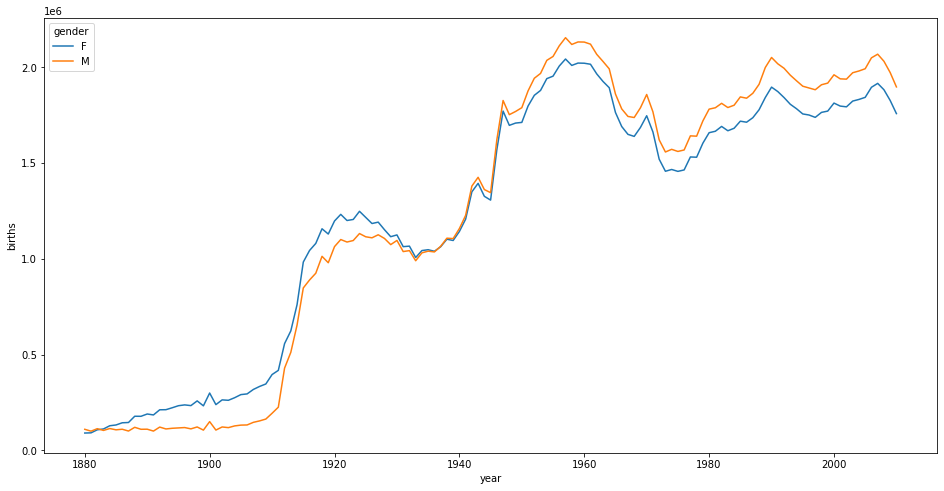

In [45]:
# draw a simmilar chart using seaborn library 

plt.figure(figsize=(16, 8))

# plt.plot(temp2.index, temp2["F"])
# plt.plot(temp2.index, temp2["M"])

sns.lineplot(x=temp1["year"], y=temp1["births"], hue=temp1["gender"])

plt.show()



<AxesSubplot:xlabel='year'>

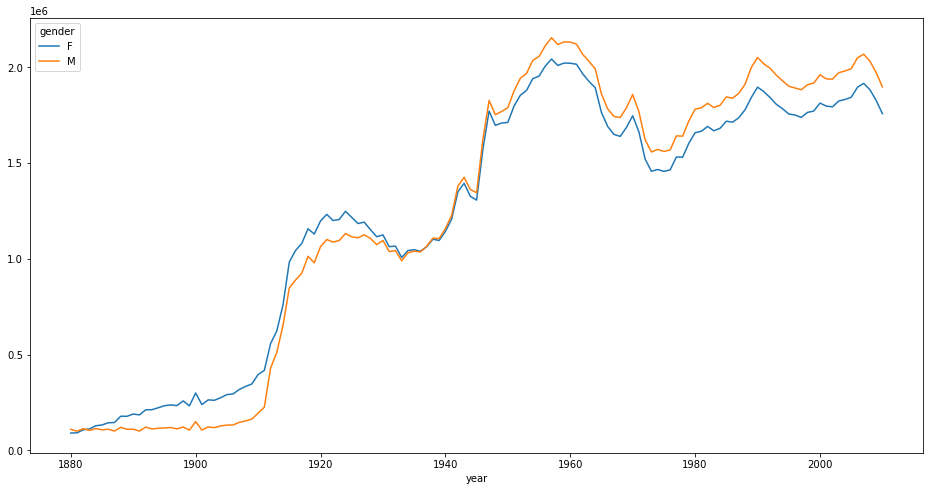

In [48]:
# draw a simmilar chart using pandas DataFrame's 'plot' method

temp2.plot(figsize=(16, 8))


## Independent Practice 
- load the dataset of 'movieslens'
- think of some interesting question
- draw appropriate charts to answer them